<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
This notebook was developed to demonstrate the fundamental concepts of Linear Regression using SKLearn and statsmodels

## Importing libraries
These are the standard libraries will will always import into our notebooks.

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

These imports are specific to performing Linear Regression using the SKLearn and statsmodels libraries

In [264]:
from sklearn.linear_model import LinearRegression

## Connect to Google Drive

In [265]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Scatterplots for Occular Test of Linearity
What does it mean to be "linear"?

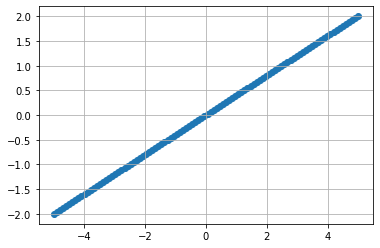

In [266]:
linear1x = np.linspace(-5,5, num=100).reshape(-1,1)
linear1y = np.linspace(-2,2, num=100) 
plt.scatter(linear1x,linear1y)
plt.grid(True)

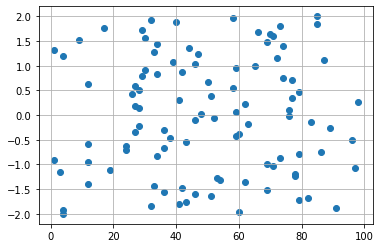

In [267]:
linear2x=np.random.randint(100, size=(100))
linear2y = np.linspace(-2,2, num=100)
plt.scatter(linear2x,linear2y)
plt.grid(True)

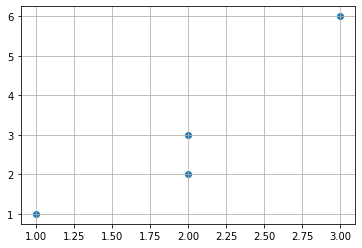

In [268]:
linear3x = [1,2,2,3]
linear3y = [1,2,3,6]
plt.scatter(linear3x,linear3y)
plt.grid(True)

(0.0, 70000.0)

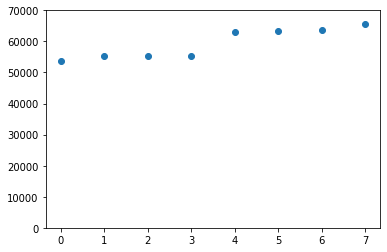

In [269]:
year = np.array([0,1,2,3,4,5,6,7]).reshape(-1,1)
income =np.array([53807,55217,55209,55415,63100,63206,63761,65766])
plt.scatter(year,income)
plt.ylim((0,70000))

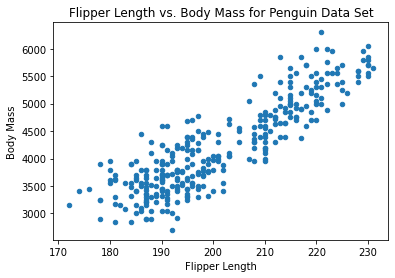

In [270]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/processed_penguins.csv')
df.plot(kind="scatter", x="flipper_length_mm", y="body_mass_g", xlabel="Flipper Length", ylabel="Body Mass", title="Flipper Length vs. Body Mass for Penguin Data Set")

## Mathematical Basis of Linear Regression
With LR, you are trying to find the line that best describes the data.  You have seen this as the equation of a line. In stats and ML we describe that line in this format:
$$  Y = a + bX $$

In this context, **b** is the set of coefficients for **X** which is our set of input variables and **a** is the intercept.

In traditional stats, Linear Regression is used to understand the relationship between inputs and the output variable. The output variable will always be continuous.  For example let's say a the formula for understanding how a penguins mass changes with flipper length could be:

 $$ Y = -6181.51 + 51.64X $$

We interpret this as every 1 millimeter of change in flipper length, contributes 51.64 to the body mass.

We can also use Linear Regression for prediction by using the formula to plug in a value of X and evaluating.  For example, a penguin with flipper length of 186mm will be predicted with:

$$ 3423.19 = -6181.51 + 51.64\times186 $$

You can have more than one input variable, if that is the case, then you are doing multiple Linear Regression.

## Create test and train data sets

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
df.head()

,study_name,species,island,clutch_completion,date_egg,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,delta_15,delta_13,study_day
0,PAL0708,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,2
1,PAL0708,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,7
2,PAL0708,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,7
3,PAL0708,Adelie,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,7
4,PAL0708,Adelie,Torgersen,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,6


For this model, I only need two columns, flipper length and body mass.

In [282]:
X = df['flipper_length_mm']
y = df['body_mass_g']

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

We need to convert our Pandas series into Numpy arrays and reshape them. This is because they don't have to correct dimensions for the algorithm.

In [284]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

# Performing Linear Regression w/Scikit-Learn
For this example, we are doing only single Linear Regression, so no need to build a pipeline. We will do that with multiple Linear Regression later.

In [285]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

We can print the intercept and coefficients like this:

In [286]:
print(lr_model.coef_, lr_model.intercept_)

[51.63824759] -6181.516427650329


### Evaluating the Performance of Linear Regresssion.
We use to primary measures, Root Mean Square Error which is given by:

$$ RMSE = \sqrt{\sum_{i=1}^N\frac{(z_{f_{i}}-z_{o_{i}})^2}{N}} $$

Don't worry about remembering this formula. We are just going to calculate this so we compare test and train.

We aslo use the $ R^2 $ value which describes how much of the variation the model captures.


Let's use the predict function for our model to make predictions and then look at the RMSE.  SKLearn has a function for this.

In [287]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [288]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

388.3294774915087
388.38384802287953


This shows us the that the model is consistent. The RSME is similar for both test and train. But how much does the model capture the variation in the data? We use the R2 measure for this.

In [289]:
r2_score(y_test, y_test_pred)

0.690616159988167

You can also get this directly from the lr_model with the score() function. Notice you get the same result (as you should).

In [281]:
lr_model.score(X_test,y_test)

0.690616159988167

From this we see that, the model only captures about 70% of the variation which is OK, but not great.

# Multiple Linear Regression
Multiple Linear Regression is similar to Single LR. The difference is you have multiple input values per target. Let's do this with just the numerical inputs from our penguin data set.

In [290]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/processed_penguins.csv')

In [291]:
df.head()

,study_name,species,island,clutch_completion,date_egg,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,delta_15,delta_13,study_day
0,PAL0708,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,2
1,PAL0708,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,7
2,PAL0708,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,7
3,PAL0708,Adelie,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,7
4,PAL0708,Adelie,Torgersen,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,6


In [292]:
X = np.array(df[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
y = np.array(df['body_mass_g'])

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [294]:
mlr_model= LinearRegression()
mlr_model.fit(X_train,y_train)
y_pred = mlr_model.predict(X_test)

In [295]:
print(mlr_model.coef_, mlr_model.intercept_)

[ 2.08877821 28.51447466 53.34042132] -7103.5759146214095


In [296]:
print(mean_squared_error(y_test, y_pred)**(0.5))

392.8094547155182


In [297]:
mlr_model.score(X_test, y_test)

0.6835251739304882

In [298]:
r2_score(y_test, y_pred)

0.6835251739304882

Our model actually did a little worse. It doesn't appear that adding all of these variables helped. Perhaps we need to include the categorical variables.

## Using a Pipeline
Let's complete this section by building a pipeline to do our analysis so we can use the categorical values after transformation.

In [299]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

We'll drop the columns we know we won't use.

In [300]:
df.drop(['study_name','island','clutch_completion','date_egg','study_day'], axis=1, inplace=True)

In [301]:
X=df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','delta_15','delta_13', 'species', 'sex']]
y=df['body_mass_g']

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [304]:
num_attribs = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm','delta_15','delta_13']  #probably won't transform these, but I set it up anyway.
cat_attribs = ['species', 'sex']

In [308]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs)],
                               remainder='passthrough'
              
                  )

In [309]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('mlr_model', LinearRegression()),
])

In [310]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'sex'])])),
                ('mlr_model', LinearRegression())])

In [311]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'sex'])])),
                ('mlr_model', LinearRegression())])

In [312]:
y_pred = pipeline.predict(X_test)

In [313]:
r2_score(y_pred, y_test)

0.8503627169263376

In [318]:
pipeline.named_steps['mlr_model'].intercept_

1459.0136313062503

In [319]:
pipeline.named_steps['mlr_model'].coef_

array([-224.66411966, -458.60874737,  683.27286702, -206.36455391,
        206.36455391,   14.55711732,   72.84580603,   18.90452131,
       -158.63791823,   62.51833087])